In [1]:
import os
import katdal
import katpoint
%pylab inline
import scape
import string
import time
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.WARNING)

Populating the interactive namespace from numpy and matplotlib


In [2]:
name = '1659787590' #'1607433065'  # e.g 1583650035
file_=str('http://archive-gw-1.kat.ac.za:7480/'+name+'/'+name+'_sdp_l0.full.rdb')
rdb = katdal.open(file_)

In [3]:
print(len(rdb.ants)-1)

61


In [4]:
def data_cal(file, nd_models, pol):
    
    ant_len = len(file.ants)
    ants = [file.ants[i].name for i in range(ant_len)]
    #ants = ['m049', 'm050','m058']
    ants.remove('m060')
    ants.remove('m024')
    
    angle_sep = {}
    temp = {}
    for ant in range(ant_len-2):
        data = scape.DataSet(file, baseline="%s" %(ants[ant]), nd_models=nd_models)
        data = data.convert_power_to_temperature()
        data = data.select(flagkeep='~nd_on') #removing the noise diode
        data = data.select(labelkeep='scan')  #keeps the scan and remove anything at the end
    
        angle_sep[ants[ant]] = np.sqrt(np.sum((np.degrees(data.scans[0].target_coords))**2,axis=0))
        temp[ants[ant]] = data.scans[0].pol(2*pol.upper()).mean(axis=1)    
        
    return angle_sep, temp, data, ants

In [31]:
angle_sep = {}
temp = {}
ants = rdb.ants
nd_model ='katconfig/user/noise-diode-models/mkat'
data = scape.DataSet(rdb, baseline="%s" %(ants[0].name), nd_models=nd_model)
data = data.convert_power_to_temperature()
data = data.select(flagkeep='~nd_on')
data = data.select(labelkeep='scan') 
angle_sep[ants[0].name] = np.sqrt(np.sum((np.degrees(data.scans[0].target_coords))**2,axis=0))
temp[ants[0].name] = data.scans[0].pol('HH').mean(axis=1)

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


In [45]:
ants = [rdb.ants[i].name for i in range(61)]

In [5]:
nd_model ='katconfig/user/noise-diode-models/mkat'
angle, temp, data, ants = data_cal(rdb, nd_model, 'h')


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma
/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scape/gaincal.py:277: RuntimeWarning: invalid value encountered in true_divide
  norm_jump = nd_delta_mu / nd_delta_sigma


In [6]:
import pandas as pd

df = pd.DataFrame.from_dict(angle)
df1 = pd.DataFrame.from_dict(temp)

df.to_csv (r'Uband_angle.csv', index = False, header=True)
df1.to_csv (r'Uband_temp.csv', index = False, header=True)

In [28]:
%store -r temp

In [30]:
%store temp

Stored 'temp' (dict)


In [31]:
%store angle

Stored 'angle' (function)


In [13]:
from operator import itemgetter

def ant_stats(ants, angle, temp):

    ant_temp = []
    ant_angle = []
    ant_std = {}
    ant_mean = {}
    for ant in ants:
        ant_std[ant] = std(temp[ant])
        ant_mean[ant] = mean(temp[ant])
        ant_temp.append(temp[ant])
        ant_angle.append(angle[ant])
    
    
    bin_temp = []
    bin_angle = []
    for i in range(178):
        bin_temp.append(list(map(itemgetter(i), ant_temp)))
        bin_angle.append(list(map(itemgetter(i), ant_angle)))

    mean_temp = []
    std_temp = []
    mean_angle = []
    for ind in range(178):
        m_t = mean(bin_temp[ind])
        s_t = std(bin_temp[ind])
        m_a = mean(bin_angle[ind])
        
        mean_temp.append(m_t)
        std_temp.append(s_t)
        mean_angle.append(m_a)
        
    mean_temp = array(mean_temp)
    std_temp = array(std_temp)
    mean_angle = array(mean_angle)
        
    return mean_temp, std_temp, mean_angle


In [22]:
nbins     = 20
ants = [rdb.ants[i].name for i in range(61)]
ants.remove('m060')
ants.remove('m024')
mean_temp, std_temp, mean_angle = ant_stats(ants, angle, temp)

#creating list of zeros using bin as size[x-values, y-values, standard deviation values]
xv       = zeros(nbins)
yv       = zeros(nbins)
sv       = zeros(nbins)

#calculating stats
mean_temp, std_temp, mean_angle = ant_stats(ants, angle, temp)

#creating values representing the x-axis 
bins     = linspace(min(mean_angle),max(mean_angle), nbins)
#print(bins)

#returing the indexes of all the values according to the binning
angle_ind  = digitize(mean_angle, bins) -1
#print(angle_ind)

In [23]:
#extracting all the values for each bin
dat = []
for k in range(nbins):
    xv[k] = mean(mean_angle[angle_ind==k])
    yv[k] = mean(mean_temp[angle_ind==k])
    sv[k] = std(mean_temp[angle_ind==k])

    dat.append([xv[k], yv[k], sv[k]])
dat = array(dat)

In [24]:
print(xv)
print(yv)
print(sv)

[ 0.52979976  1.55596182  2.5825397   3.57114434  4.65735648  5.64651507
  6.70059699  7.75356073  8.80535229  9.7903104  10.77411494 11.82225445
 12.8689916  13.9142951  14.95811917 16.00038132 17.04104435 18.08003827
 19.05199873 19.5640059 ]
[418.50805664 378.76010132 210.87713623  60.31176376  25.9603672
  20.91539192  18.80519867  18.05500412  17.40987778  16.86844254
  16.19041824  16.43437386  17.30173683  17.75116158  17.34661865
  16.61670303  16.585495    16.57618332  16.78103065  16.57212067]
[5.35756767e-01 4.98120918e+01 5.91082077e+01 1.66536217e+01
 3.26309991e+00 7.74815679e-01 3.63762945e-01 2.80339360e-01
 1.82915375e-01 2.23259211e-01 1.42888859e-01 2.52426803e-01
 3.73081237e-01 1.54655054e-01 1.89873874e-01 1.00459166e-01
 3.35825756e-02 8.27440694e-02 7.29766414e-02 0.00000000e+00]


Q1 quantile :  16.773065090179443
Q2 quantile :  17.90839195251465
The median is :  104.77171


TypeError: 'function' object is not subscriptable

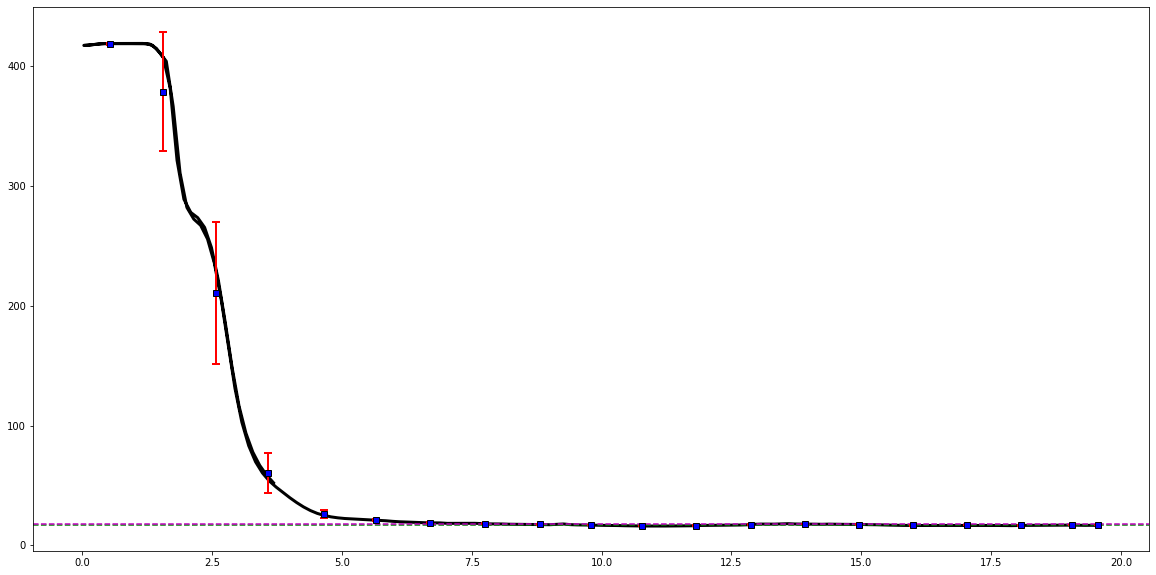

In [32]:
ants = [rdb.ants[i].name for i in range(61)]
ants.remove('m060')
ants.remove('m024')
q1 = np.quantile(mean_temp, .25)
print("Q1 quantile : ", q1) 
q2 = np.quantile(mean_temp, .50)
print("Q2 quantile : ", q2 ) 
#q3 = np.quantile(mean_temp, .75)
#print("Q3 quantile : ", q3)

figure(figsize=(20, 10))
subplots_adjust(hspace=0.5)

median_ = median(mean_temp)
print("The median is : ", mean(mean_temp))

pol = 'h'

plot(mean_angle, mean_temp, "-k", label='average', linewidth=3)
errorbar(xv, yv, sv, fmt='ks',lw=2,capsize=4, capthick=2, zorder=3, mfc='b', mec='black',ecolor='r')
axhline(y = q1, color='g', linestyle='--', label="Q1")
axhline(y = q2, color='m', linestyle='--', label="Median")
#axhline(y = q3, color='y', linestyle='--', label="Q3")
for index, ant in enumerate(ants):
    plot(angle[ant], temp[ant], "*c", alpha=0.05)
    text(16, 45, 'Q1 = 16.77 K', fontsize = 15, color = 'g')
    text(16, 43, 'Median = 17.90 K', fontsize = 15, color = 'm')
    #text(8, 41, 'Q3 = 37.17 K', fontsize = 15, color = 'y')
#     fill_between(mean_angle, mean_temp-std_temp, mean_temp+std_temp,
#                  facecolor="orange", # The fill color
#                  color='blue',       # The outline color
#                  alpha=0.2)
    #ylim(None, 50)
    #xlim(None, 20)
    xlabel('Seperation[degrees]', fontsize=20)
    ylabel('Temperature[K]', fontsize=20)
    title('System temperature of MeerKAT in proximity to the Sun', fontsize=30)
    legend(loc='center left', bbox_to_anchor=(1, 0.5))
grid()
show()